# **Problem Statement**

This project aims to build a machine learning model to detect fraudulent transactions using historical data. The goal is to reduce false positives and false negatives, improving accuracy. The model will also support real-time fraud detection to enhance security and protect financial institutions from losses.

# **Goal**

The goal of this dataset is to build a model that accurately identifies fraudulent transactions, helping financial institutions reduce fraud and prevent losses.

# **Features**

Transaction_ID: Unique identifier for each transaction.

User_ID: Unique identifier for each user.

Transaction_Amount: The amount of money involved in the transaction.

Transaction_Type: The type of transaction (e.g., ATM Withdrawal, Bill Payment).

Time_of_Transaction: The time when the transaction occurred.

Device_Used: The device used for the transaction (e.g., Mobile, Tablet, Desktop).

Location: The location where the transaction took place.

Previous_Fraudulent_Transactions: Number of previous fraud cases associated with the user.

Account_Age: The age of the account (in days).

Number_of_Transactions_Last_24H: Number of transactions made by the user in the last 24 hours.

Payment_Method: Method of payment used (e.g., Credit Card, Debit Card).

# **Target Variable**

Fraudulent: Indicates whether the transaction is fraudulent (1 = Fraudulent, 0 = Not Fraudulent).

In [ ]:
#importing necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Understand the data**

In [ ]:
# load csv dataset
df=pd.read_csv('/content/Fraud Detection Dataset.csv')
df

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50995,T33982,2339,3112.51,Bill Payment,15.0,Mobile,New York,0,7,8,Debit Card,0
50996,T31261,2152,2897.15,Online Purchase,3.0,Mobile,Miami,1,75,11,Net Banking,1
50997,T12293,3345,2204.43,POS Payment,18.0,Mobile,San Francisco,3,73,5,Credit Card,0
50998,T42287,1518,4787.17,POS Payment,19.0,Tablet,New York,2,108,14,Net Banking,0


In [ ]:
df.head(10)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0
5,T6,2095,2372.04,ATM Withdrawal,15.0,Desktop,Boston,3,96,14,Credit Card,0
6,T7,4772,544.81,Bill Payment,2.0,Tablet,Boston,3,6,9,UPI,1
7,T8,4092,635.75,ATM Withdrawal,13.0,Tablet,Boston,2,13,10,Debit Card,0
8,T9,2638,2318.87,Bank Transfer,NaN,Mobile,San Francisco,4,110,12,Debit Card,0
9,T10,3169,3656.17,Bill Payment,3.0,Mobile,Chicago,4,66,3,Net Banking,0


In [ ]:
df.sample(10)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
46264,T46265,3023,2944.22,Bill Payment,0.0,Unknown Device,San Francisco,1,40,4,Credit Card,0
18759,T18760,1869,1143.41,POS Payment,NaN,NaN,San Francisco,1,112,4,Debit Card,0
13428,T13429,1972,3784.88,Bill Payment,1.0,Tablet,Boston,2,52,4,UPI,0
6797,T6798,1089,3456.83,Online Purchase,7.0,Mobile,Los Angeles,0,114,11,Credit Card,0
22088,T22089,3025,4099.39,Bill Payment,1.0,Desktop,Seattle,4,73,2,Credit Card,0
46189,T46190,4440,2884.78,Online Purchase,15.0,Desktop,Seattle,1,3,5,Net Banking,0
11027,T11028,3061,2116.91,Online Purchase,2.0,NaN,Miami,3,5,12,Debit Card,0
28496,T28497,4762,127.64,ATM Withdrawal,4.0,Mobile,Seattle,3,94,13,Debit Card,0
19930,T19931,3228,4180.83,ATM Withdrawal,12.0,Tablet,NaN,0,22,1,Net Banking,0
32381,T32382,2317,529.54,Online Purchase,5.0,Unknown Device,Boston,3,44,3,Credit Card,0


In [ ]:
df.shape

(51000, 12)

In [ ]:
# Checking the data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

# **Data cleaning**

In [ ]:
df.isnull().sum()

,0
Transaction_ID,0
User_ID,0
Transaction_Amount,2520
Transaction_Type,0
Time_of_Transaction,2552
Device_Used,2473
Location,2547
Previous_Fraudulent_Transactions,0
Account_Age,0
Number_of_Transactions_Last_24H,0


In [ ]:
df['Transaction_Amount'].value_counts()

,count
Transaction_Amount,
49997.80,508
3562.91,4
1747.31,4
2748.08,4
495.14,4
...,...
623.00,1
1646.54,1
2395.02,1


In [ ]:
df['Transaction_Amount'].unique()

array([1292.76, 1554.58, 2395.02, ...,  647.11, 2446.65, 2867.43])

<Axes: xlabel='Transaction_Amount', ylabel='Count'>

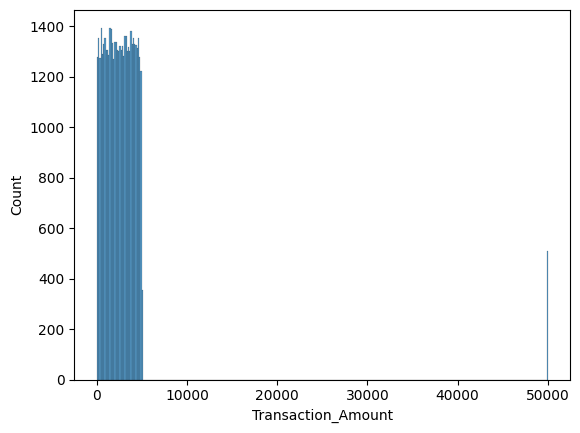

In [ ]:
sns.histplot(df['Transaction_Amount'])

In [ ]:
df['Transaction_Amount'] = df['Transaction_Amount'].fillna(df['Transaction_Amount'].median())

<Axes: xlabel='Time_of_Transaction', ylabel='Count'>

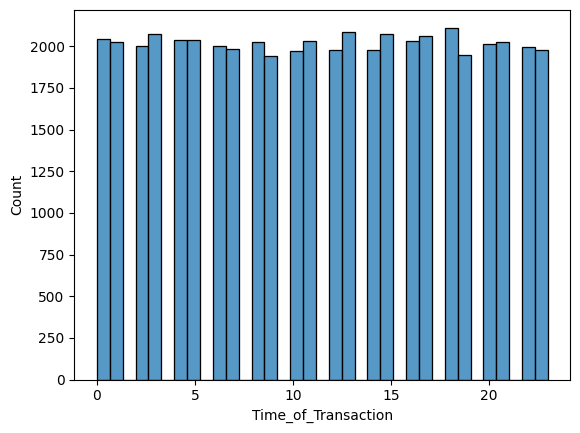

In [ ]:
sns.histplot(df['Time_of_Transaction'])

In [ ]:
df['Time_of_Transaction'] = df['Time_of_Transaction'].fillna(df['Time_of_Transaction'].mean())

In [ ]:
df.isnull().sum()

,0
Transaction_ID,0
User_ID,0
Transaction_Amount,0
Transaction_Type,0
Time_of_Transaction,0
Device_Used,2473
Location,2547
Previous_Fraudulent_Transactions,0
Account_Age,0
Number_of_Transactions_Last_24H,0


In [ ]:
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df['Device_Used'] = df['Device_Used'].fillna(df['Device_Used'].mode()[0])
df['Payment_Method'] = df['Payment_Method'].fillna(df['Payment_Method'].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                51000 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               51000 non-null  float64
 5   Device_Used                       51000 non-null  object 
 6   Location                          51000 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    51000 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

# **Descriptive Statistics**

In [ ]:
# Summary numerical colum statistics for the numerical columns
df.describe()

,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,51000.000000,51000.000000,51000.000000,51000.000000,51000.000000,51000.000000,51000.000000
mean,3005.110176,2972.920030,11.488400,1.995725,60.033902,7.495588,0.049216
std,1153.121107,4918.801144,6.747518,1.415150,34.384131,4.020080,0.216320
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2007.000000,1333.787500,6.000000,1.000000,30.000000,4.000000,0.000000
50%,2996.000000,2524.100000,11.488400,2.000000,60.000000,7.000000,0.000000
75%,4006.000000,3724.987500,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


# **Data visualization**

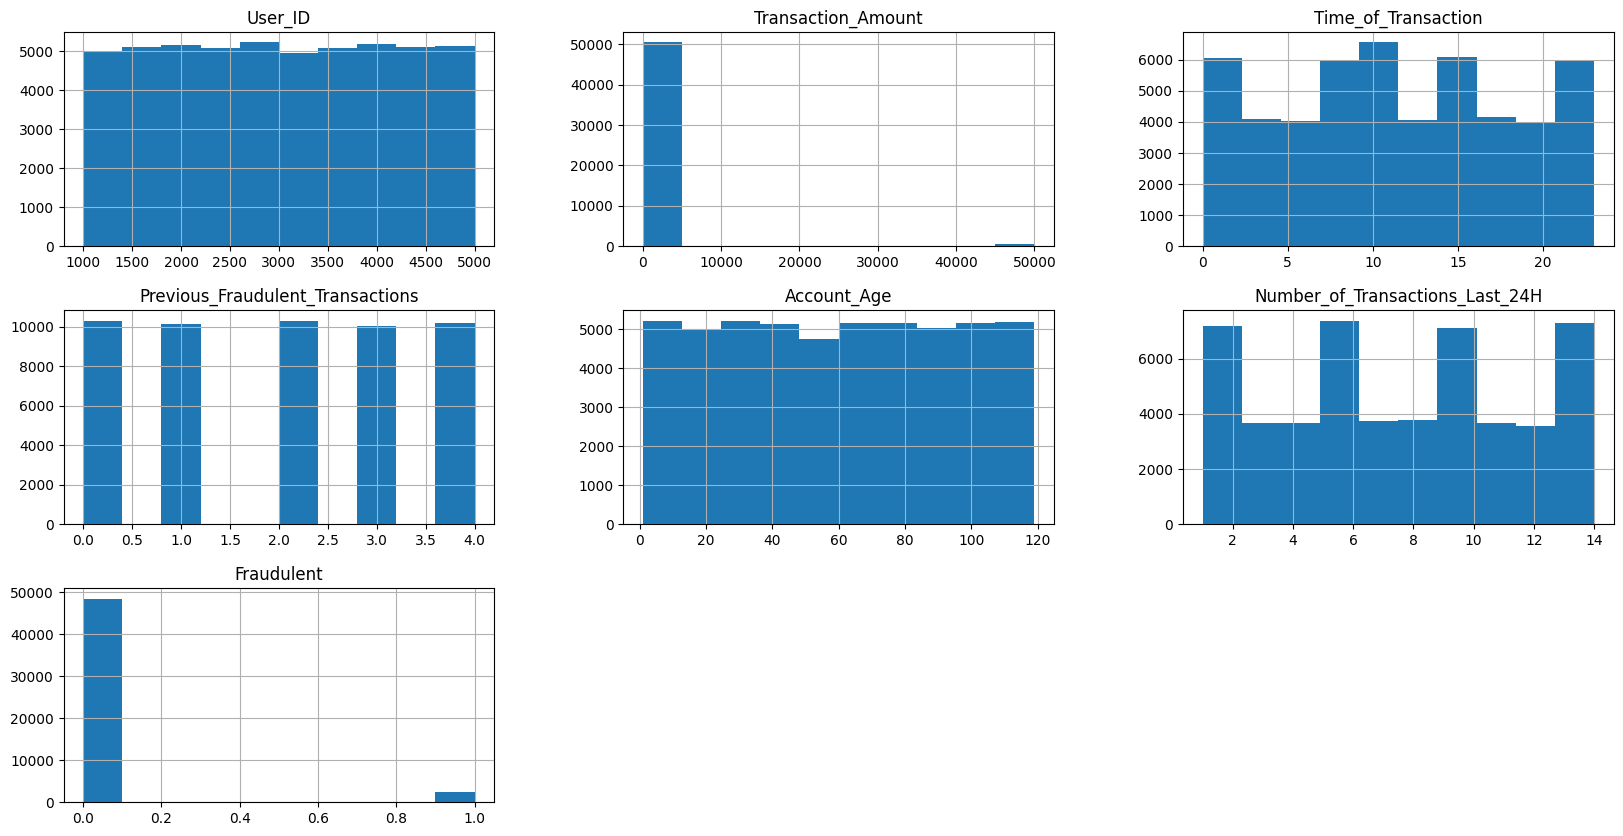

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(20,10))
plt.show()

* User_ID: The distribution of User_ID appears uniform, meaning the user IDs are evenly distributed across the dataset.

* Transaction_Amount: This column has a right-skewed distribution, with most transaction amounts clustered at lower values, but there is a significant outlier around the 50,000 mark.

* Transaction_Type: This feature seems binary or categorical with a heavy imbalance. One category (perhaps 0) dominates, while the other has much fewer occurrences.

* Time_of_Transaction: The transaction times are relatively evenly distributed throughout the day, suggesting transactions occur consistently at different times.

* Location: There appear to be a few distinct locations with similar distributions, though some regions show fewer transactions.

* Previous_Fraudulent_Transactions: This seems categorical, with a fairly balanced distribution among the four categories.

* Account_Age: Account ages are somewhat uniformly distributed, with more transactions coming from accounts with ages clustered between 0 and 120.

* Number_of_Transactions_Last_24H: The distribution of transactions in the last 24 hours shows balanced activity across different counts.

* Fraudulent: This is binary (fraudulent or not), with most transactions being non-fraudulent.

* Device_Used_Mobile, Device_Used_Tablet, Device_Used_Unknown: These binary features show that most transactions occur via mobile, fewer via tablet, and some via unknown devices.

* Payment_Method (Debit Card, Invalid Method, Net Banking, UPI): These binary columns show that most transactions are not done via the respective methods, but there are some clusters for each payment method.

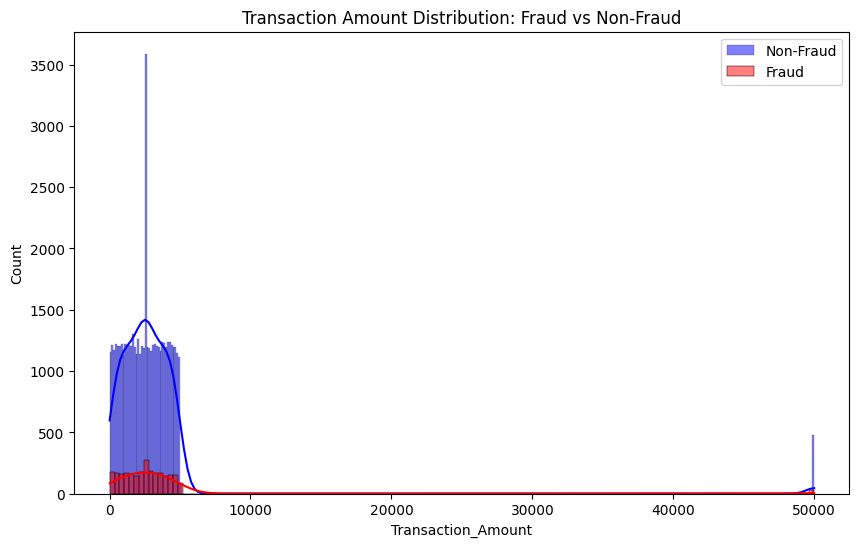

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Fraudulent'] == 0]['Transaction_Amount'], color='blue', label='Non-Fraud', kde=True)
sns.histplot(df[df['Fraudulent'] == 1]['Transaction_Amount'], color='red', label='Fraud', kde=True)
plt.title('Transaction Amount Distribution: Fraud vs Non-Fraud')
plt.legend()
plt.show()

* This graph compares the distribution of transaction amounts for fraudulent and non-fraudulent transactions.

In [ ]:
# plt.figure(figsize=(10, 6))
# df.groupby('Time_of_Transaction')['Fraudulent'].sum().plot(kind='line', color='blue')
# plt.title('Fraudulent Transactions Over Time')
# plt.ylabel('Number of Fraudulent Transactions')
# plt.xlabel('Time of Transaction')
# plt.show()


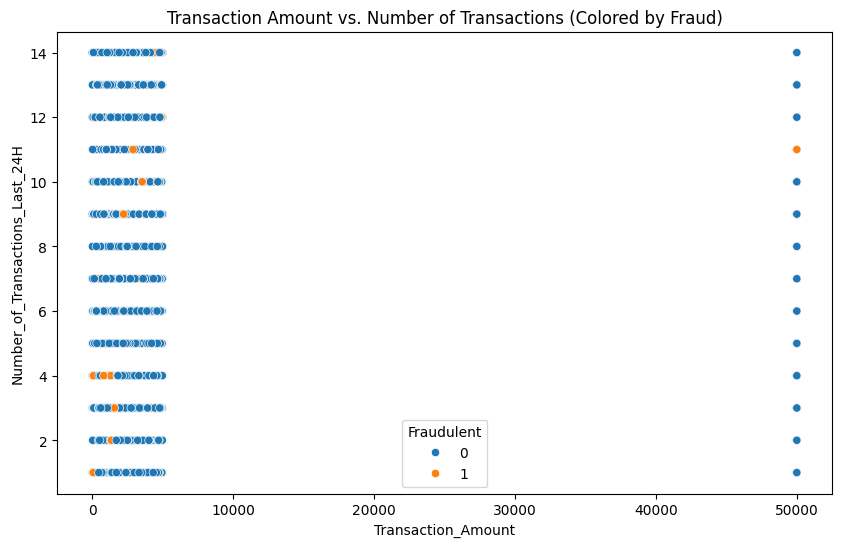

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Transaction_Amount', y='Number_of_Transactions_Last_24H', hue='Fraudulent', data=df)
plt.title('Transaction Amount vs. Number of Transactions (Colored by Fraud)')
plt.show()

* This scatter plot can reveal whether higher transaction amounts or a higher number of recent transactions are associated with fraud.

# **Outlier Detection**

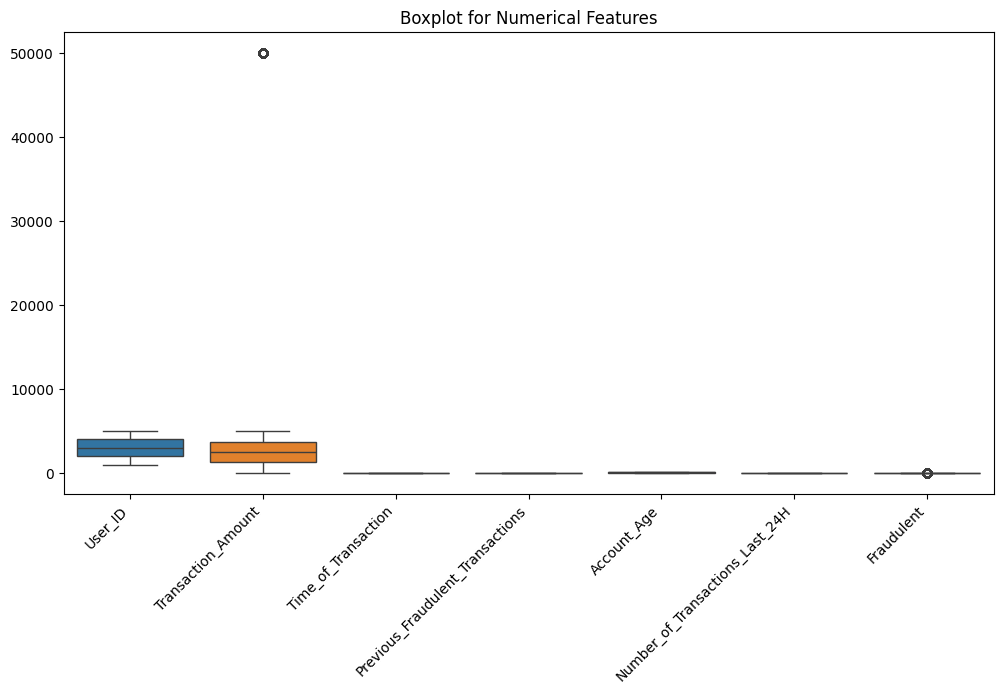

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot for Numerical Features')
plt.show()

In [ ]:
df

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0000,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0000,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,11.4884,Mobile,Boston,3,115,9,UPI,0
3,T4,2294,100.10,Bill Payment,15.0000,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0000,Mobile,San Francisco,2,57,7,Credit Card,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50995,T33982,2339,3112.51,Bill Payment,15.0000,Mobile,New York,0,7,8,Debit Card,0
50996,T31261,2152,2897.15,Online Purchase,3.0000,Mobile,Miami,1,75,11,Net Banking,1
50997,T12293,3345,2204.43,POS Payment,18.0000,Mobile,San Francisco,3,73,5,Credit Card,0
50998,T42287,1518,4787.17,POS Payment,19.0000,Tablet,New York,2,108,14,Net Banking,0


<Axes: ylabel='Device_Used'>

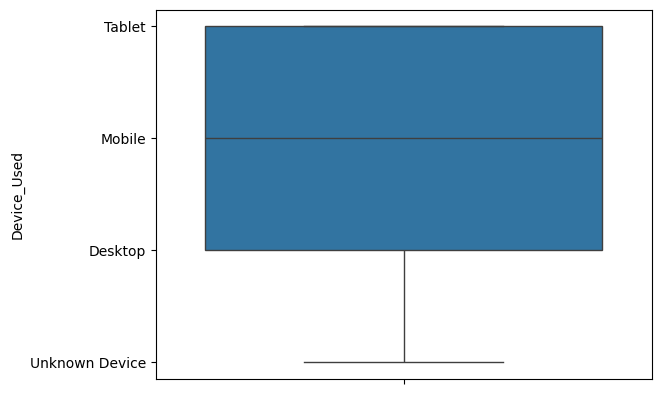

In [ ]:
sns.boxplot(df['Device_Used'])

<Axes: ylabel='Payment_Method'>

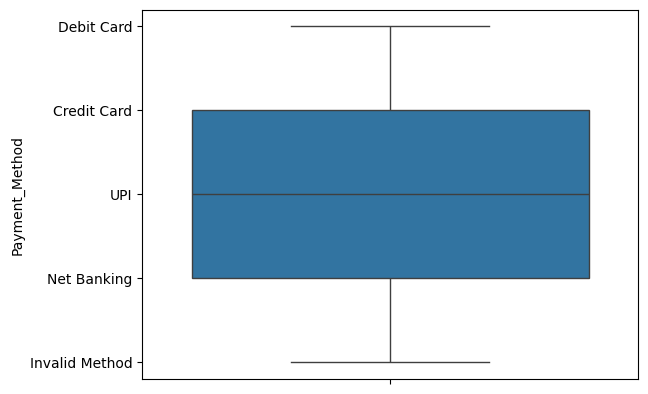

In [ ]:
sns.boxplot(df['Payment_Method'])

<Axes: ylabel='Location'>

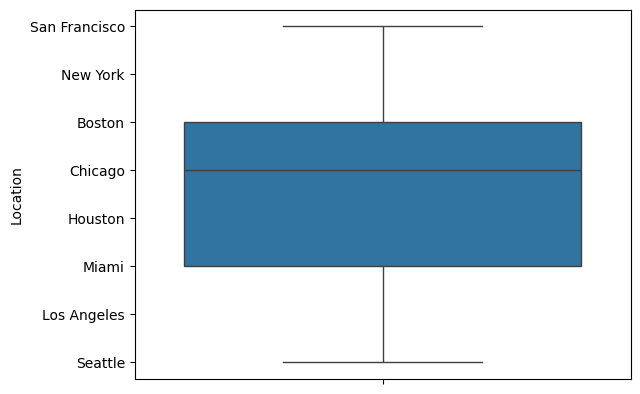

In [ ]:
sns.boxplot(df['Location'])

<Axes: ylabel='Transaction_Type'>

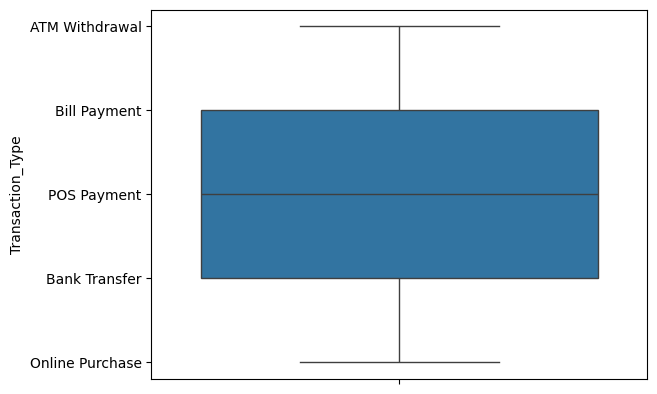

In [ ]:
sns.boxplot(df['Transaction_Type'])

In [ ]:
# Calculate the IQR for Transaction_Amount
Q1 = df['Transaction_Amount'].quantile(0.25)
Q3 = df['Transaction_Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['Transaction_Amount'] >= lower_bound) & (df['Transaction_Amount'] <= upper_bound)]

In [ ]:
# Cap outliers
df['Transaction_Amount'] = np.where(df['Transaction_Amount'] < lower_bound, lower_bound, df['Transaction_Amount'])
df['Transaction_Amount'] = np.where(df['Transaction_Amount'] > upper_bound, upper_bound, df['Transaction_Amount'])

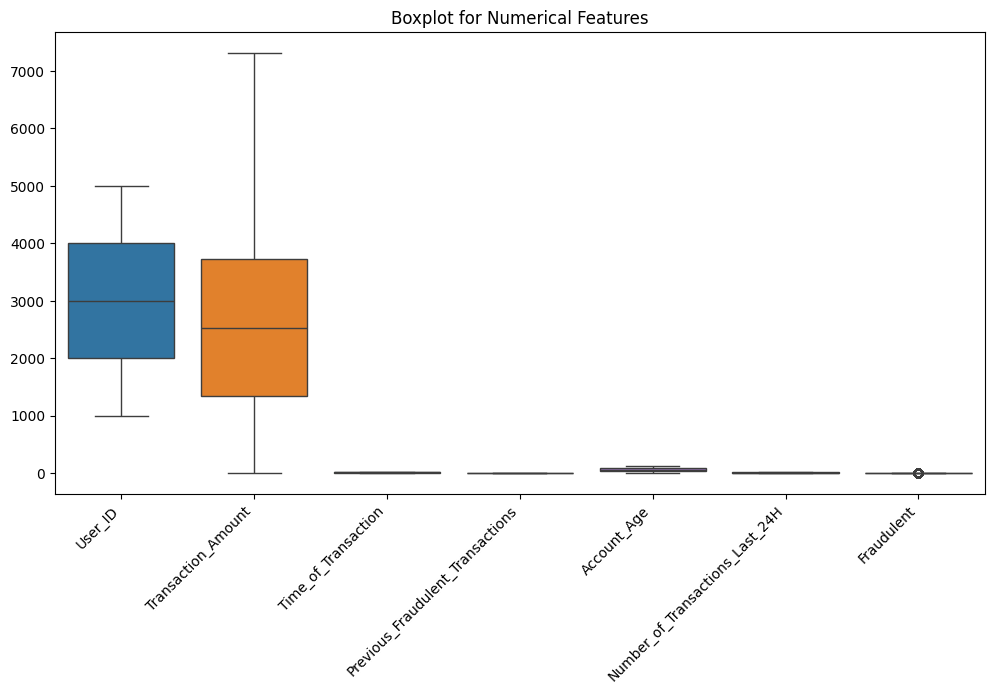

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot for Numerical Features')
plt.show()

In [ ]:

# Check for skewness in numerical features
from scipy.stats import skew

numerical_features = df.select_dtypes(include=np.number).columns
skewness = df[numerical_features].apply(lambda x: skew(x.dropna()))

# Print skewness values
print("Skewness of Numerical Features:")
print(skewness)

# Identify highly skewed features (e.g., skewness > 1 or < -1)
highly_skewed_features = skewness[abs(skewness) > 1].index

print("\nHighly Skewed Features:")
print(highly_skewed_features)


# Apply transformations to reduce skewness (e.g., log transformation, Box-Cox transformation)
# Example: Log transformation for 'Transaction_Amount'
df['Transaction_Amount_log'] = np.log1p(df['Transaction_Amount'])
# You can apply other transformations to other skewed features

# Re-calculate skewness after transformation
skewness_after_transform = df[numerical_features].apply(lambda x: skew(x.dropna()))
print("\nSkewness after Transformation:")
skewness_after_transform

Skewness of Numerical Features:
User_ID                            -0.001565
Transaction_Amount                  0.246842
Time_of_Transaction                -0.004480
Previous_Fraudulent_Transactions    0.004440
Account_Age                        -0.002970
Number_of_Transactions_Last_24H     0.005220
Fraudulent                          4.167792
dtype: float64

Highly Skewed Features:
Index(['Fraudulent'], dtype='object')

Skewness after Transformation:


,0
User_ID,-0.001565
Transaction_Amount,0.246842
Time_of_Transaction,-0.004480
Previous_Fraudulent_Transactions,0.004440
Account_Age,-0.002970
Number_of_Transactions_Last_24H,0.005220
Fraudulent,4.167792


In [ ]:
df = df.drop('Transaction_ID', axis=1)

it does not contribute to fraud prediction.

# **encoding**

## **Label encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])

In [ ]:
df['Transaction_Type'].unique()
df['Transaction_Type'].value_counts()

,count
Transaction_Type,
Bill Payment,10340
Bank Transfer,10276
ATM Withdrawal,10164
POS Payment,10126
Online Purchase,10094


In [ ]:
df['Transaction_Type'] = le.fit_transform(df['Transaction_Type'])

## **One-Hot Encoding**

In [ ]:
df = pd.get_dummies(df, columns=['Device_Used'], drop_first=True, dtype=int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   User_ID                           51000 non-null  int64  
 1   Transaction_Amount                51000 non-null  float64
 2   Transaction_Type                  51000 non-null  int64  
 3   Time_of_Transaction               51000 non-null  float64
 4   Location                          51000 non-null  int64  
 5   Previous_Fraudulent_Transactions  51000 non-null  int64  
 6   Account_Age                       51000 non-null  int64  
 7   Number_of_Transactions_Last_24H   51000 non-null  int64  
 8   Payment_Method                    51000 non-null  object 
 9   Fraudulent                        51000 non-null  int64  
 10  Transaction_Amount_log            51000 non-null  float64
 11  Device_Used_Mobile                51000 non-null  int64  
 12  Devi

In [ ]:
df = pd.get_dummies(df, columns=['Payment_Method'], drop_first=True, dtype=int)

# **Correlation**

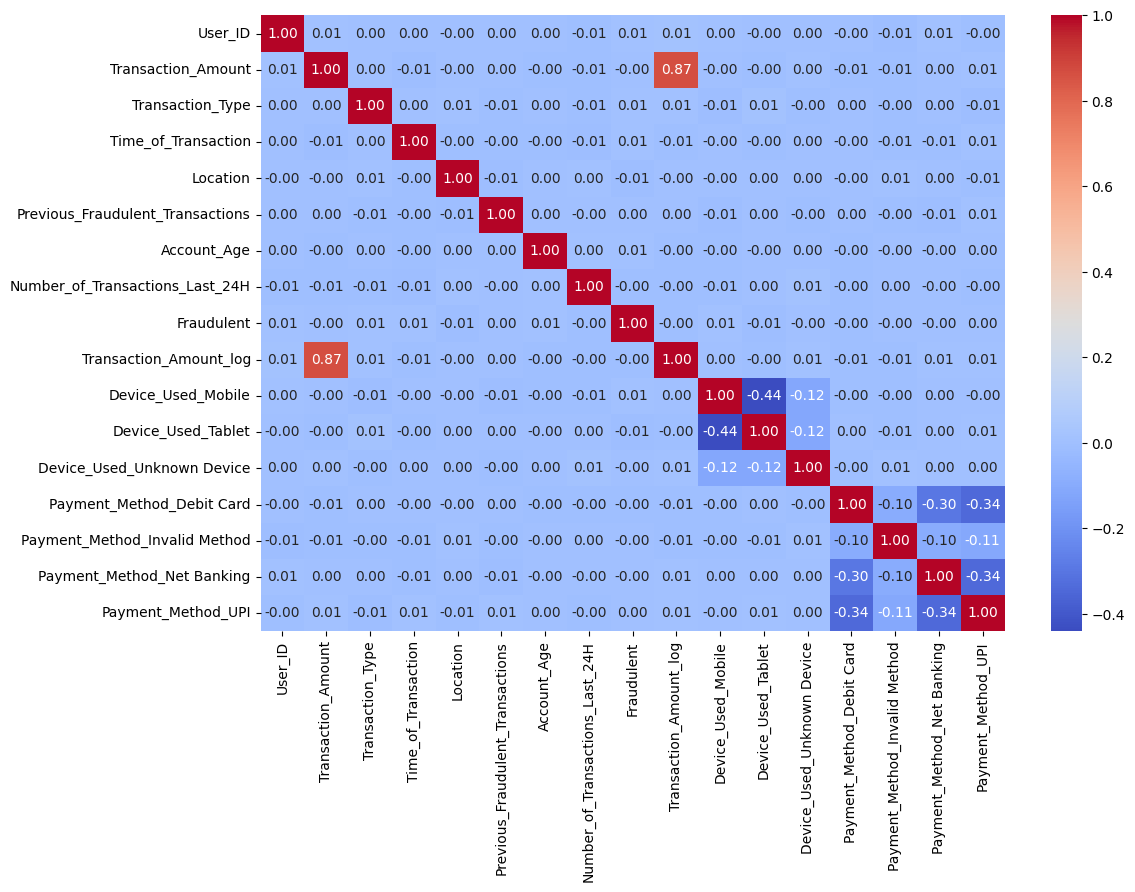

In [ ]:
plt.figure(figsize=(12, 8))
numerical_features = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
corr_matrix

,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent,Transaction_Amount_log,Device_Used_Mobile,Device_Used_Tablet,Device_Used_Unknown Device,Payment_Method_Debit Card,Payment_Method_Invalid Method,Payment_Method_Net Banking,Payment_Method_UPI
User_ID,1.000000,0.007873,0.002106,0.001892,-0.000592,0.002567,0.001749,-0.005847,0.008046,0.011897,0.004228,-0.000517,0.000935,-0.000532,-0.010579,0.009110,-0.001758
Transaction_Amount,0.007873,1.000000,0.002351,-0.008902,-0.001489,0.000066,-0.003697,-0.005379,-0.000488,0.867573,-0.000972,-0.003405,0.004266,-0.005371,-0.006353,0.003068,0.005576
Transaction_Type,0.002106,0.002351,1.000000,0.002651,0.006513,-0.005255,0.001361,-0.006935,0.007112,0.005529,-0.009136,0.011157,-0.004257,0.001209,-0.002058,0.001092,-0.007830
Time_of_Transaction,0.001892,-0.008902,0.002651,1.000000,-0.003747,-0.003323,-0.002976,-0.009040,0.006845,-0.007193,-0.000082,-0.004983,0.001130,-0.001330,-0.005984,-0.005220,0.007735
Location,-0.000592,-0.001489,0.006513,-0.003747,1.000000,-0.007675,0.001721,0.004719,-0.008402,-0.000134,-0.001525,0.003861,0.002010,-0.000174,0.005315,0.003151,-0.007119
Previous_Fraudulent_Transactions,0.002567,0.000066,-0.005255,-0.003323,-0.007675,1.000000,0.000956,-0.000303,0.001136,0.001470,-0.010259,0.002666,-0.004911,0.000442,-0.002799,-0.008779,0.007498
Account_Age,0.001749,-0.003697,0.001361,-0.002976,0.001721,0.000956,1.000000,0.004215,0.006203,-0.004148,-0.003705,-0.000097,0.001722,-0.002494,-0.001012,-0.000546,0.001429
Number_of_Transactions_Last_24H,-0.005847,-0.005379,-0.006935,-0.009040,0.004719,-0.000303,0.004215,1.000000,-0.003877,-0.001928,-0.005409,0.003269,0.010744,-0.002324,0.000250,-0.000866,-0.003445
Fraudulent,0.008046,-0.000488,0.007112,0.006845,-0.008402,0.001136,0.006203,-0.003877,1.000000,-0.002789,0.007384,-0.007511,-0.000159,-0.001901,-0.001222,-0.000032,0.002108
Transaction_Amount_log,0.011897,0.867573,0.005529,-0.007193,-0.000134,0.001470,-0.004148,-0.001928,-0.002789,1.000000,0.002853,-0.004555,0.007479,-0.005620,-0.006023,0.006283,0.006065


# **Dimentionality reduction**

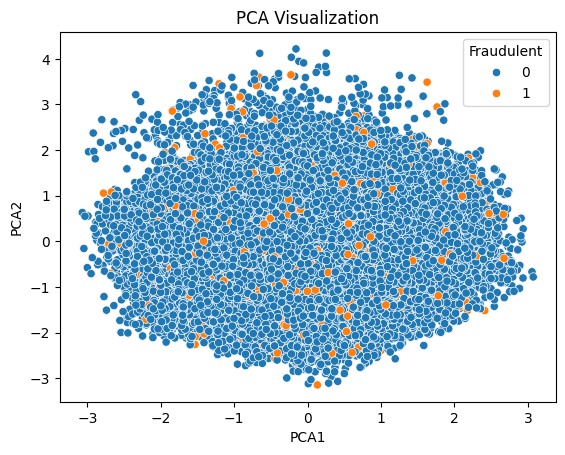

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features = ['Transaction_Amount', 'Time_of_Transaction', 'Previous_Fraudulent_Transactions', 'Account_Age', 'Number_of_Transactions_Last_24H']
X = StandardScaler().fit_transform(df[features])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Fraudulent', data=df)
plt.title('PCA Visualization')
plt.show()

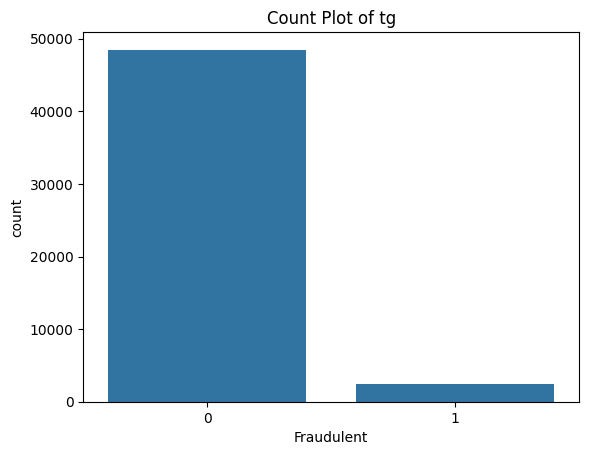

In [ ]:
# prompt: count plot of tg

import matplotlib.pyplot as plt
sns.countplot(x='Fraudulent', data=df) # Assuming 'tg' is a column in your DataFrame 'df'
plt.title('Count Plot of tg')
plt.show()


In [ ]:
df.shape

(51000, 19)

In [ ]:
df.columns

Index(['User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Time_of_Transaction', 'Location', 'Previous_Fraudulent_Transactions',
       'Account_Age', 'Number_of_Transactions_Last_24H', 'Fraudulent',
       'Transaction_Amount_log', 'Device_Used_Mobile', 'Device_Used_Tablet',
       'Device_Used_Unknown Device', 'Payment_Method_Debit Card',
       'Payment_Method_Invalid Method', 'Payment_Method_Net Banking',
       'Payment_Method_UPI', 'PCA1', 'PCA2'],
      dtype='object')

# **Scalling**

## **standardScaler**

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# df[['User_ID','Transaction_Amount','Transaction_Type','Time_of_Transaction',
#     'Location','Previous_Fraudulent_Transactions','Account_Age', 'Number_of_Transactions_Last_24H','Device_Used_Mobile', 'Device_Used_Tablet',
#      'Device_Used_Unknown Device', 'Payment_Method_Debit Card','Payment_Method_Invalid Method', 'Payment_Method_Net Banking',
#     'Payment_Method_UPI', 'PCA1', 'PCA2']]=sc.fit_transform(df[['User_ID', 'Transaction_Amount', 'Transaction_Type',
#        'Time_of_Transaction', 'Location', 'Previous_Fraudulent_Transactions','Account_Age', 'Number_of_Transactions_Last_24H','Device_Used_Mobile', 'Device_Used_Tablet',
#        'Device_Used_Unknown Device', 'Payment_Method_Debit Card','Payment_Method_Invalid Method', 'Payment_Method_Net Banking',
#        'Payment_Method_UPI', 'PCA1', 'PCA2']])


In [ ]:
y=df['Fraudulent']
x=df.drop(columns=['Fraudulent'])

In [ ]:
from sklearn.preprocessing import StandardScaler
# standardization
standard_scaler=StandardScaler()
df_scaled=standard_scaler.fit_transform(df)
df_scaled

array([[ 1.01368475, -0.85111003, -1.41390679, ..., -0.6259149 ,
        -0.48927737, -2.2019424 ],
       [ 1.30246905, -0.67354647, -1.41390679, ..., -0.6259149 ,
         0.4145183 , -0.25662881],
       [-0.99306256, -0.10356893, -1.41390679, ...,  1.59766129,
        -0.89440075, -0.80049067],
       ...,
       [ 0.29475929, -0.23282506,  1.42107764, ..., -0.6259149 ,
         0.78085447, -0.33294251],
       [-1.28965184,  1.51876194,  1.42107764, ..., -0.6259149 ,
        -0.86768746, -0.35518403],
       [-0.59847742, -1.17531171,  1.42107764, ..., -0.6259149 ,
        -0.65432481, -0.75442909]])

## **Smote**

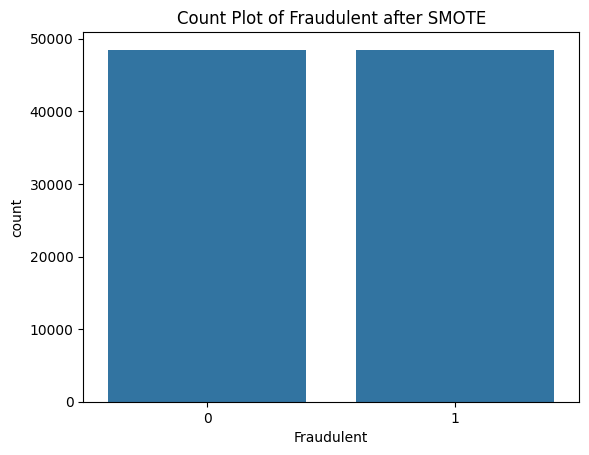

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(x_resampled, columns=x.columns)
df_resampled['Fraudulent'] = y_resampled

# Now df_resampled contains the balanced dataset
sns.countplot(x='Fraudulent', data=df_resampled)
plt.title('Count Plot of Fraudulent after SMOTE')
plt.show()

In [ ]:
df['Fraudulent']

,Fraudulent
0,0
1,0
2,0
3,0
4,0
...,...
50995,0
50996,1
50997,0
50998,0


# **Traning The Modeling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median'
X = imputer.fit_transform(X)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the model
model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Perform Randomized Search
random_search = RandomizedSearchCV(
    model, param_dist, n_iter=20, cv=5, verbose=2, n_jobs=-1, random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)  # This line starts the training process

# Get the best model
best_model = random_search.best_estimator_

# Evaluate performance
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Make predictions using the trained model
y_pred = best_model.predict(X_test)  # Use best_model for predictions

# Calculate and print evaluation metrics (add necessary imports)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}
Best Score: 0.9511029411764707
Accuracy: 0.9501960784313725
Precision: 0.75
Recall: 0.01171875
F1 Score: 0.023076923076923078
